In [ ]:
from google.colab import files

files.upload()

In [2]:
import pandas as pd
from datetime import datetime as dt
import numpy as np
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}': lambda x: np.sin(2 * np.pi * (df[col_name] - start_num) / period),
        f'cos_{col_name}': lambda x: np.cos(2 * np.pi * (df[col_name] - start_num) / period)
    }
    return df.assign(**kwargs)

In [4]:
df = pd.read_csv('train.csv')
df = df[['time', 'temp', 'el_price', 'coco', 'consumption']].dropna()

df['hour'] = df['time'].apply(lambda x: dt.strptime(str(x), "%Y-%m-%d %H:%M:%S%z").hour)
df['month'] = df['time'].apply(lambda x: dt.strptime(str(x), "%Y-%m-%d %H:%M:%S%z").month)

df = generate_cyclical_features(df, 'hour', 24, 0)
df = generate_cyclical_features(df, 'month', 12, 1)

# Witout cyclical features

In [5]:
features = ['temp', 'el_price', 'coco', 'hour', 'month']
X = df[features]
y = df['consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=False)
print(X_train.shape)
print(X_test.shape)


(8226, 5)
(168, 5)


In [6]:
model1 = LinearRegression()
model2 = Ridge(alpha=0.1)
model3 = Lasso(alpha=0.1)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

print(model1.coef_)
print(model2.coef_)
print(model3.coef_)

[-0.02951706 -1.02705209  0.01247867  0.01830048 -0.00522305]
[-0.02951881 -1.02601257  0.01247851  0.01829717 -0.00522611]
[-0.03069804 -0.          0.00865811  0.01297452 -0.00040033]


0.5034681152335194
0.5032048431827247
0.3234790904631287


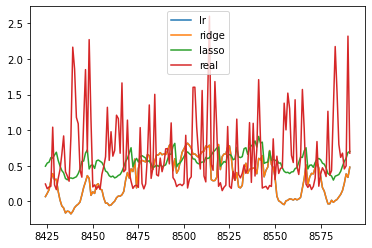

In [9]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

mse1 = ((y_test - pred1) ** 2).mean()
print(mse1)
mse2 = ((y_test - pred2) ** 2).mean()
print(mse2)
mse3 = ((y_test - pred3) ** 2).mean()
print(mse3)

results = pd.DataFrame({'lr': pred1, 'ridge': pred2, 'lasso': pred3, 'real': y_test})
results.plot()

# With cyclical features

In [10]:
features = ['temp', 'el_price', 'coco', 'cos_hour', 'cos_month']
X = df[features]
y = df['consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.02, shuffle=False)
print(X_train.shape)
print(X_test.shape)

(8226, 5)
(168, 5)


In [11]:
model1 = LinearRegression()
model2 = Ridge(alpha=0.1)
model3 = Lasso(alpha=0.1)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

print(model1.coef_)
print(model2.coef_)
print(model3.coef_)

[-0.0125782  -0.5740938   0.01401991  0.19016352  0.22474618]
[-0.01257861 -0.57352852  0.01401948  0.19016884  0.22475862]
[-0.02919086 -0.          0.01024049  0.          0.        ]


0.4294792146967906
0.42938430244623277
0.35257117366837487


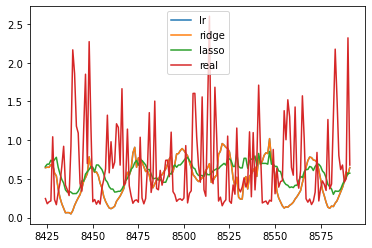

In [12]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

mse1 = ((y_test - pred1) ** 2).mean()
print(mse1)
mse2 = ((y_test - pred2) ** 2).mean()
print(mse2)
mse3 = ((y_test - pred3) ** 2).mean()
print(mse3)

results = pd.DataFrame({'lr': pred1, 'ridge': pred2, 'lasso': pred3, 'real': y_test})
results.plot()

# Trained on last 2 weeks

In [13]:
features = ['temp', 'el_price', 'coco', 'cos_hour', 'cos_month']
X = df[features].tail(504)
y = df['consumption'].tail(504)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.333, shuffle=False)
print(X_train.shape)
print(X_test.shape)

(336, 5)
(168, 5)


In [14]:
model1 = LinearRegression()
model2 = Ridge(alpha=0.1)
model3 = Lasso(alpha=0.1)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

print(model1.coef_)
print(model2.coef_)
print(model3.coef_)

[ 2.60696290e-02  4.63130657e-02  9.12845335e-03 -1.15782699e-01
  1.96715669e-31]
[ 2.60797945e-02  4.60678148e-02  9.13163595e-03 -1.15668798e-01
  7.50905864e-30]
[ 0.03028217  0.          0.0022491  -0.          0.        ]


0.23795312289191545
0.2379441167207384
0.23686346451740198


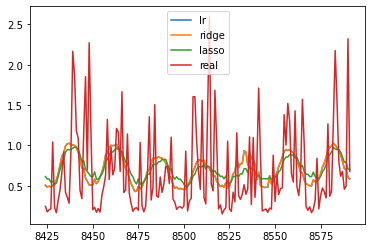

In [15]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)

mse1 = ((y_test - pred1) ** 2).mean()
print(mse1)
mse2 = ((y_test - pred2) ** 2).mean()
print(mse2)
mse3 = ((y_test - pred3) ** 2).mean()
print(mse3)

results = pd.DataFrame({'lr': pred1, 'ridge': pred2, 'lasso': pred3, 'real': y_test})
results.plot()

# Submission

In [16]:
features = ['temp', 'el_price', 'coco', 'cos_hour', 'cos_month']
X = df[features].tail(336)
y = df['consumption'].tail(336)

model = Lasso(alpha=0.1)

model.fit(X, y)

test = pd.read_csv('test.csv')
test = test[['time', 'temp', 'el_price', 'coco']]

test['hour'] = test['time'].apply(lambda x: dt.strptime(str(x), "%Y-%m-%d %H:%M:%S%z").hour)
test['month'] = test['time'].apply(lambda x: dt.strptime(str(x), "%Y-%m-%d %H:%M:%S%z").month)

test = generate_cyclical_features(test, 'hour', 24, 0)
test = generate_cyclical_features(test, 'month', 12, 1)

predicitons = model.predict(test[features])

submissions = pd.DataFrame({'time': test['time'], 'consumption': predicitons})
submissions.to_csv('submissions_ridge.csv', index=False)